In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
cd Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


In [4]:
proliferation = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                            header=None, index_col=[0,1], squeeze=True)
proliferation = proliferation[:,1]
proliferation.name = 'proliferation'

In [5]:
v = rna_df.ix['ABCB1'][:,'01']

In [22]:
cancer = run.load_cancer('HNSC')
rna = cancer.load_data('mRNASeq')

In [23]:
%%time
rr = {}
for i,v in rna.pathways.iterrows():
    rr[i] = get_cox_ph_ms(surv_5y, v, [proliferation, age > 75], 
                          interactions=False)

CPU times: user 58.1 s, sys: 43.8 ms, total: 58.1 s
Wall time: 58.1 s


In [24]:
pd.concat(rr,1).T.sort('LR').head()

,LR,feature_p,fmla,hazzard
REACTOME_CELLEXTRACELLULAR_MATRIX_INTERACTIONS,0.000853,0.000967,"Surv(days, event) ~ feature + proliferation + ...",1.31
REACTOME_STRIATED_MUSCLE_CONTRACTION,0.000887,0.000758,"Surv(days, event) ~ feature + proliferation + ...",1.3
REACTOME_MUSCLE_CONTRACTION,0.00109,0.000943,"Surv(days, event) ~ feature + proliferation + ...",1.29
BIOCARTA_PLATELETAPP_PATHWAY,0.00233,0.0028,"Surv(days, event) ~ feature + proliferation + ...",1.28
BIOCARTA_IL4_PATHWAY,0.00368,0.00428,"Surv(days, event) ~ feature + proliferation + ...",1.26


In [32]:
rr2 = {}
for g in run.gene_sets['REACTOME_STRIATED_MUSCLE_CONTRACTION']:
    if g not in rna.df.index:
        continue
    rr2[g] = get_cox_ph_ms(surv_5y, rna.df.ix[g][:,'01'], [proliferation, age > 75], 
                          interactions=False)
rr2 = pd.concat(rr2,1).T.sort('LR')

In [33]:
rr2.head()

,LR,feature_p,fmla,hazzard
DES,0.000121,0.000138,"Surv(days, event) ~ feature + proliferation + ...",1.07
MYL1,0.000151,0.000159,"Surv(days, event) ~ feature + proliferation + ...",1.05
MYL2,0.000263,0.000273,"Surv(days, event) ~ feature + proliferation + ...",1.06
ACTN2,0.000913,0.000875,"Surv(days, event) ~ feature + proliferation + ...",1.06
TNNI1,0.000971,0.000859,"Surv(days, event) ~ feature + proliferation + ...",1.1


In [34]:
idx = rna.df.columns.levels[0]
cox(proliferation.ix[idx], surv_5y)

hazard       exp(coef)      47.79
             exp(-coef)      0.02
             lower .95       2.85
             upper .95     800.45
LR           stat            7.75
             df              1.00
             p               0.01
concordance  stat            0.56
             se              0.02
dtype: float64

In [35]:
v = rna.df.ix[['MYL1']].mean()[:,'01']
cox(v, surv_5y)

hazard       exp(coef)     1.03
             exp(-coef)    0.97
             lower .95     1.01
             upper .95     1.06
LR           stat          6.92
             df            1.00
             p             0.01
concordance  stat          0.56
             se            0.02
dtype: float64

In [45]:
p = proliferation.ix[v.index].dropna()
p = (pd.DataFrame({q: p > p.quantile(q) for q in np.arange(.2,1.01, .5)})
                 .apply(pd.Series.idxmin,1))

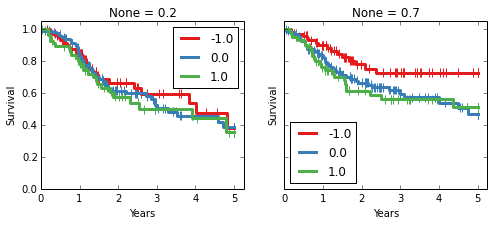

In [46]:
v = rna.df.ix['MYL1'][:,'01']
draw_survival_curves(to_quants(v, std=1),
                     surv_5y, p, legend=True)

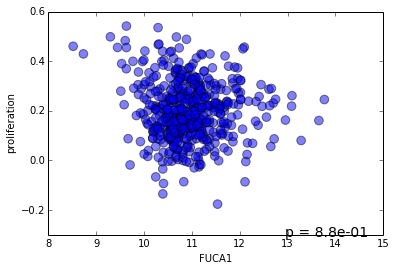

In [53]:
series_scatter(rna.df.ix['FUCA1'][:,'01'], proliferation)

In [55]:
r = {}
for c in codes.unique():
    try:
        r[c] = get_cox_ph_ms(surv_5y, rna_df.ix['FUCA1'][:,'01'].ix[ti(codes==c)], 
                            [proliferation], 
                            interactions=False)
    except:
        print c

STAD
ESCA
LAML


In [56]:
pd.concat(r, 1).T.sort('LR').head()

,LR,feature_p,fmla,hazzard
ACC,1.59e-05,9.2e-06,"Surv(days, event) ~ feature + proliferation\n",0.414
KIRC,5.44e-05,6.76e-05,"Surv(days, event) ~ feature + proliferation\n",0.599
LGG,0.00168,0.00157,"Surv(days, event) ~ feature + proliferation\n",1.69
BLCA,0.00565,0.00356,"Surv(days, event) ~ feature\n",0.791
SARC,0.00856,0.00948,"Surv(days, event) ~ feature + proliferation\n",0.756


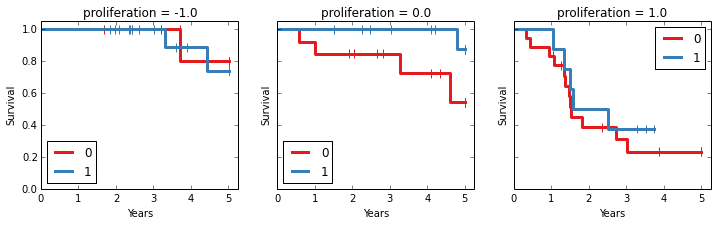

In [77]:
draw_survival_curves(to_quants(rna_df.ix['FUCA1'][:,'01'].ix[ti(codes=='ACC')].dropna(), 
                               q=.5),
                     surv_5y, to_quants(proliferation.ix[ti(codes=='ACC')].dropna(), 
                                        q=.33), legend=True)

In [59]:
r = {}
for c in codes.unique():
    try:
        r[c] = get_cox_ph_ms(surv_5y, rna_df.ix['ENGASE'][:,'01'].ix[ti(codes==c)], 
                            [proliferation], 
                            interactions=False)
    except:
        print c

STAD
ESCA
LAML


In [36]:
pd.concat(r, 1).T.sort('LR').head()

,LR,feature_p,fmla,hazzard
CESC,0.000992,0.000567,"Surv(days, event) ~ feature + proliferation\n",0.812
UCEC,0.00197,0.00214,"Surv(days, event) ~ feature + proliferation\n",0.823
LIHC,0.00797,0.00869,"Surv(days, event) ~ feature + proliferation\n",0.855
PAAD,0.013,0.0132,"Surv(days, event) ~ feature + proliferation\n",1.22
HNSC,0.0152,0.0147,"Surv(days, event) ~ feature + proliferation\n",0.903
